In [1]:
from CFRalgorithm import TempleCFR
import numpy as np

iterations = 100
experiments = 1

experiment_utilites = np.zeros((experiments, iterations, 3))
for experiment in range(experiments):
	k = TempleCFR(iterations, {}, {})
	utilities = k.cfr_iterations_external()
	experiment_utilites[experiment][:][:] = utilities

100%|██████████| 100/100 [00:04<00:00, 24.93it/s]

Average game value 0: -0.3583564268315484
Average game value 1: -0.02276595765919216
Average game value 2: -0.5409050071686687


In [2]:
len(k.nodes) 

12176

In [4]:
for node in k.nodes:
    if k.nodes[node].get_average_strategy()[0]!=.5:
        print(node)
        print("regret_sum",k.nodes[node].regret_sum)
        print("strategy",k.nodes[node].get_strategy())
        print("strategy sum",k.nodes[node].strategy_sum)    
        print("average strategy",k.nodes[node].get_average_strategy())

P:0,R:attacker,C:GoldFireEmptyGameInits->(P:0
regret_sum [0.]
strategy [1.]
strategy sum [1.66770935]
average strategy [1.]
P:1,R:defender,C:GoldGoldFireGameInits->(P:0,A:(1, 1))->(P:1
regret_sum [6.26427922e-19 2.36115140e-18 0.00000000e+00 0.00000000e+00
 1.49378966e-18 2.36115140e-18 1.49378966e-18 2.36115140e-18
 0.00000000e+00]
strategy [0.05855856 0.22072072 0.         0.         0.13963964 0.22072072
 0.13963964 0.22072072 0.        ]
strategy sum [1.63025333e-23 1.63025333e-23 1.63025333e-23 1.63025333e-23
 1.63025333e-23 1.63025333e-23 1.63025333e-23 1.63025333e-23
 1.63025333e-23]
average strategy [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
P:2,R:attacker,C:EmptyEmptyEmptyGameInits->(P:0,A:(1, 1))->(P:1,A:(1, 2))->(P:2
regret_sum [0.]
strategy [1.]
strategy sum [0.]
average strategy [1.]
P:2,R:attacker,C:EmptyEmptyEmptyGameInits->(P:0,A:(1, 1))->(P:1,A:(0, 0))->(P:2
regret_sum [0.]
strategy [1.]
strategy sum [0.]
avera

/Users/pacoaristi/miniconda3/envs/torchrl/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/pacoaristi/miniconda3/envs/torchrl/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


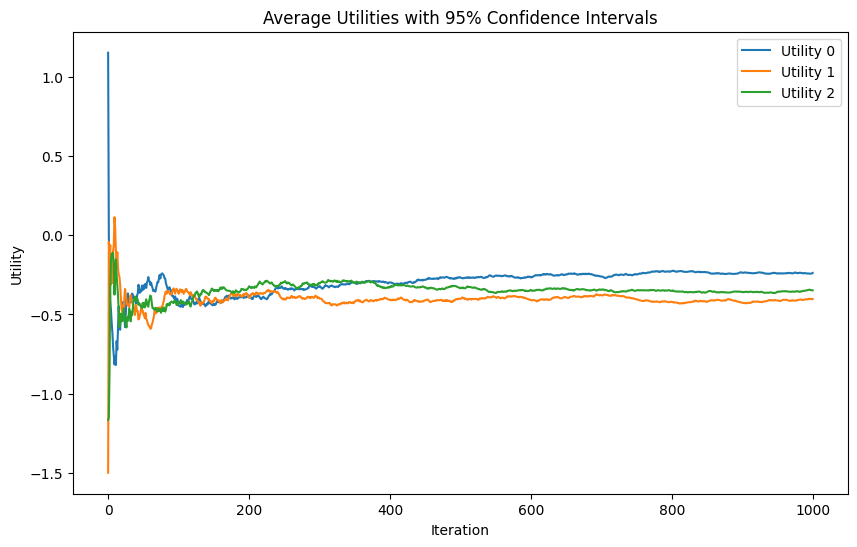

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

# Calculate mean and standard error across experiments (axis=0)
mean_utilities = experiment_utilites.mean(axis=0)
stderr_utilities = sem(experiment_utilites, axis=0)

# Plot mean with confidence interval (mean ± 1.96*stderr for ~95% CI)
df_mean = pd.DataFrame(mean_utilities)
df_stderr = pd.DataFrame(stderr_utilities)

plt.figure(figsize=(10, 6))
for col in df_mean.columns:
    plt.plot(df_mean.index, df_mean[col], label=f'Utility {col}')
    plt.fill_between(
        df_mean.index,
        df_mean[col] - 1.96 * df_stderr[col]/experiments,
        df_mean[col] + 1.96 * df_stderr[col]/experiments,
        alpha=0.2
    )

plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title('Average Utilities with 95% Confidence Intervals')
plt.legend()
plt.show()